## Data Preprocessing

### import library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict
import random
random_color = ["#"+''.join([random.choice('0123456789abcdef') for j in range(6)]) for i in range(120)]

### Read data


In [2]:
df = pd.read_csv('../CrawlData/all_data/in4_movie_final.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../CrawlData/all_data/in4_movie_final.csv'

In [ ]:
df.head(2)

,Unnamed: 0,Synonyms,Genre,English,Aired,Licensors,Demographics,Studios,Theme,Ranked,...,Type,Producers,Genres,Popularity,Duration,Rating,Premiered,German,Status,score
0,0,[' Frieren at the Funeral '],"['AdventureAdventure, DramaDrama, ...","["" Frieren: Beyond Journey's End ""]","[' Sep 29, 2023 to Mar 22, 2024 ']",[' 葬送のフリーレン '],[],['Madhouse '],[],"["" #122 based on the top anime page. Pleas...",...,['TV'],"['Aniplex, Dentsu, Shogakukan-Shue...","['AdventureAdventure, DramaDrama, ...",[' #277'],[' 24 min. per ep. '],[' PG-13 - Teens 13 or older '],['Fall 2023'],[],[' Finished Airing '],9.37
1,1,[' Hagane no Renkinjutsushi: Fullmetal Alchemi...,"['ActionAction, AdventureAdventure, ...",[' Fullmetal Alchemist: Brotherhood '],"[' Apr 5, 2009 to Jul 4, 2010 ']",[' 鋼の錬金術師 FULLMETAL ALCHEMIST '],[],['Bones '],['MilitaryMilitary '],"["" #222 based on the top anime page. Pleas...",...,['TV'],"['Aniplex, Square Enix, Mainichi B...","['ActionAction, AdventureAdventure, ...",[' #3'],[' 24 min. per ep. '],[' R - 17+ (violence & profanity) '],['Spring 2009'],[],[' Finished Airing '],9.09


In [ ]:
temp = df['score']

### Hiện tại các trường đang ở dạng list hết nên cần phải convert hết về string

In [ ]:
#! các trường mà chỉ có [] thì phải replace bằng từ nan. Còn lại thì convert hết ra str. 
df = df.drop(columns=['Unnamed: 0','score']).reset_index(drop=True)


In [ ]:
#! convert toàn bộ cột về dạng str
for col in df.columns:
    df[col] = df[col].str[2:-2]

### Lúc này nếu bấm info() thì sẽ không thấy string rỗng -> replace toàn bộ string rỗng với từ nan

In [ ]:
#! fill empty string with nan
df = df.replace('',np.NAN)

In [ ]:
#1 cột rank nên để dạng số từ 1 tới hết (thực ra rank là id)
rank = [i for i in range(1,len(df)+1)]
df['Ranked'] = rank

### kiểm tra thông tin các trường, Nếu có vấn đề, phân vào kiểu dữ liệu mình muốn dựa trên đặc điểm của bộ dữ liệu và hiểu biết của bản thân về bộ dữ liệu


In [ ]:
#! Phát hiện ra các dòng không cùng kiểu dữ liệu và sửa nó:
df['Episodes'] = df['Episodes'].replace( '  Unknown  ','0')
df['Episodes'][744] = '14'
df['Episodes'][4536] = '14'
df['Episodes'][1783] = '14'
df['Episodes'][1844] = '14'
df['Episodes'][2132] = '4'
df['Episodes'][2947] = '2'
df['Episodes'][3316] = '14'
df['Episodes'][3330] = '14'
df['Episodes'][4474] = '2'

In [ ]:
#! check cot member
df['Members'][1728] = '493966'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_664\389316046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Members'][1728] = '493966'


In [ ]:

#! trường member là float, trường favourites, episodes, popularity là số hết
df['Members'] = df['Members'].apply(lambda x: x.replace(",",""))
df['Members'] = df['Members'].astype(int)
df['Favorites'] = df['Favorites'].apply(lambda x: x.replace(",",""))
df['Favorites'] = df['Favorites'].astype(int)
df['Episodes'] = df['Episodes'].apply(lambda x: x.replace(",",""))
df['Episodes'] = df['Episodes'].astype(int)
df['Popularity'] = df['Popularity'].apply(lambda x: x.replace("#",""))
df['Popularity'] = df['Popularity'].astype(int)

### chỉ lấy những phim chiếu từ năm 2000 - 2024

In [ ]:
#! drop row that in Aired below 2000:
#! find row that Aired below 2000:
remove_row_index = []
for i in range(len(df['Aired'])):
    if df['Aired'][i][-6] != '2':
        remove_row_index.append(i)

In [ ]:
df =df.drop(remove_row_index).reset_index(drop=True)

### loại bỏ hết khoảng trắng trong string

In [ ]:
#! loại hết khoảng trắng trong các giá trị
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Synonyms      2899 non-null   object
 1   Genre         4106 non-null   object
 2   English       3121 non-null   object
 3   Aired         4185 non-null   object
 4   Licensors     4183 non-null   object
 5   Demographics  18 non-null     object
 6   Studios       4185 non-null   object
 7   Theme         3266 non-null   object
 8   Ranked        4185 non-null   int64 
 9   Demographic   1732 non-null   object
 10  Source        4185 non-null   object
 11  Broadcast     2068 non-null   object
 12  Members       4185 non-null   int64 
 13  Themes        1834 non-null   object
 14  Favorites     4185 non-null   int64 
 15  Episodes      4185 non-null   int64 
 16  French        1158 non-null   object
 17  Type          4185 non-null   object
 18  Producers     4185 non-null   object
 19  Genres

In [ ]:
# df.head(3)

### fill nan đối với các string trong Demographic. không được drop vì trường này là quan trọng

In [ ]:
#! trong toàn bộ ds thì có bao nhiêu là cho nam, cho nữ, nam ít tuổi, nam lớn tuổi, nữ ít, nữ to...
df['Demographic'] = df['Demographic'].fillna('All')
df['Theme'] = df['Theme'].fillna('all')

### có một số trường dữ liệu có nan, dựa vào hiểu biết của bản thân để fill nó

In [ ]:
df['Broadcast'] = df['Broadcast'].fillna('not buy')
df['Premiered'] = df['Premiered'].fillna('to be anncouced')

In [ ]:
df['English'] = df['English'].fillna(df['Synonyms'])
df['Theme'] = df['Theme'].fillna(df['Themes'])
df = df.dropna(subset=['English']).reset_index(drop=True)
df['Title'] = df['English']
df = df.set_index('Title')
df = df.reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3865 non-null   object
 1   Synonyms      2899 non-null   object
 2   Genre         3808 non-null   object
 3   English       3865 non-null   object
 4   Aired         3865 non-null   object
 5   Licensors     3864 non-null   object
 6   Demographics  18 non-null     object
 7   Studios       3865 non-null   object
 8   Theme         3865 non-null   object
 9   Ranked        3865 non-null   int64 
 10  Demographic   3865 non-null   object
 11  Source        3865 non-null   object
 12  Broadcast     3865 non-null   object
 13  Members       3865 non-null   int64 
 14  Themes        1709 non-null   object
 15  Favorites     3865 non-null   int64 
 16  Episodes      3865 non-null   int64 
 17  French        1138 non-null   object
 18  Type          3865 non-null   object
 19  Produc

In [ ]:
for i in range(len(df['Demographic'])):
    if df['Demographic'][i] == "ShounenShounen":
        df.loc[i,'Demographic'] = "Shounen"
    elif df['Demographic'][i] == "SeinenSeinen":
        df.loc[i,'Demographic'] = "Seinen"
    elif df['Demographic'][i] == "ShoujoShoujo":
        df.loc[i,'Demographic'] = "Shojo"
    elif df['Demographic'][i] == "KidsKids":
        df.loc[i,'Demographic'] = "Kids"
    elif df['Demographic'][i] == "joseijosei": 
        df.loc[i,'Demographic']= "josei" 
    elif "," in df['Demographic'][i]:
        df.loc[i,'Demographic'] = "Kids, Shounen" 


In [ ]:
df['Genre'] = df['Genre'].fillna('All type')

In [ ]:
def convert(string):
    check=[]
    res = []
    cnt=  0
    #string='AdventureAdventure,         DramaDrama,         FantasyFantasy'
    for my_str in [x.strip() for x in string.split(",")]:
        
        if my_str == 'all':
            return my_str
        else:
            
            for char in my_str:
                if ord(char) >= 65 and ord(char) < 97:
                    if char in check:
                        #print(char)
                        key = cnt
                        #print(key)
                        temp = my_str[:key]
                        res.append(temp)
                check.append(char)
                cnt += 1
            cnt = 0
            check = []
    
    return ', '.join(res).replace(", Sci-FiSci-","")         

In [ ]:
convert('all')

'all'

In [ ]:
for i in range(len(df['Genre'])):
    df.loc[i,'Genre'] = convert(df['Genre'][i])
for i in range(len(df['Theme'])):
    df.loc[i,'Theme']=convert(df['Theme'][i])

In [ ]:
df['score'] = temp

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
#! xóa những cột không dùng
df = df.drop(columns=['Synonyms','Demographics','Genres','Themes','French','German','English']).reset_index(drop=True)

### Kiểm tra lại lần cuối các trường data

In [ ]:
df.describe()

,Ranked,Members,Favorites,Episodes,Popularity,score
count,3865.000000,3.865000e+03,3865.000000,3865.000000,3865.000000,3865.000000
mean,2403.734541,1.969187e+05,2542.455627,14.155757,3422.460802,7.634365
std,1447.399085,3.617310e+05,10475.526317,37.702491,2916.735449,0.410581
min,1.000000,4.230000e+02,0.000000,1.000000,1.000000,7.150000
25%,1131.000000,2.040300e+04,36.000000,1.000000,1177.000000,7.320000
50%,2357.000000,6.772000e+04,194.000000,12.000000,2648.000000,7.520000
75%,3631.000000,2.051820e+05,1074.000000,13.000000,4845.000000,7.850000
max,5000.000000,3.946499e+06,226011.000000,1787.000000,16906.000000,9.370000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        3865 non-null   object 
 1   Genre        3865 non-null   object 
 2   Aired        3865 non-null   object 
 3   Licensors    3864 non-null   object 
 4   Studios      3865 non-null   object 
 5   Theme        3865 non-null   object 
 6   Ranked       3865 non-null   int64  
 7   Demographic  3865 non-null   object 
 8   Source       3865 non-null   object 
 9   Broadcast    3865 non-null   object 
 10  Members      3865 non-null   int64  
 11  Favorites    3865 non-null   int64  
 12  Episodes     3865 non-null   int64  
 13  Type         3865 non-null   object 
 14  Producers    3865 non-null   object 
 15  Popularity   3865 non-null   int64  
 16  Duration     3865 non-null   object 
 17  Rating       3865 non-null   object 
 18  Premiered    3865 non-null   object 
 19  Status

In [ ]:
df.head(3)

,Title,Genre,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,Broadcast,...,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status,score
0,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy","Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,all,1,Shounen,Manga,Fridays at 23:00 (JST),...,40537,28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing,9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy","Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,Military,2,Shounen,Manga,"Sundays at 17:00 (JST) ', 'Aniplex, ...",...,226011,64,TV,"Aniplex, Square Enix, Mainichi Bro...",3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing,9.09
2,Steins;Gate,"Drama, Sci-Fi, Suspense","Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"Psychological, Time , Time Travel, Time Travel...",3,All,Visual novel,Wednesdays at 02:05 (JST),...,189650,24,TV,"Frontier Works, Media Factory, Kad...",13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing,9.07


#movie là một tập dài (hơn 1h30p) (chỉ có 1 tập); TV là 23-25p 1 tập (có nhiều tập)  #TV special: tập đặc biệt ; ONA: ngoại truyện; OVA: tập thêm 


In [ ]:
df.to_csv('./preprocessed_in4_data.csv')

## data analysis

### các từ được sử dụng chủ yếu trong tên phim

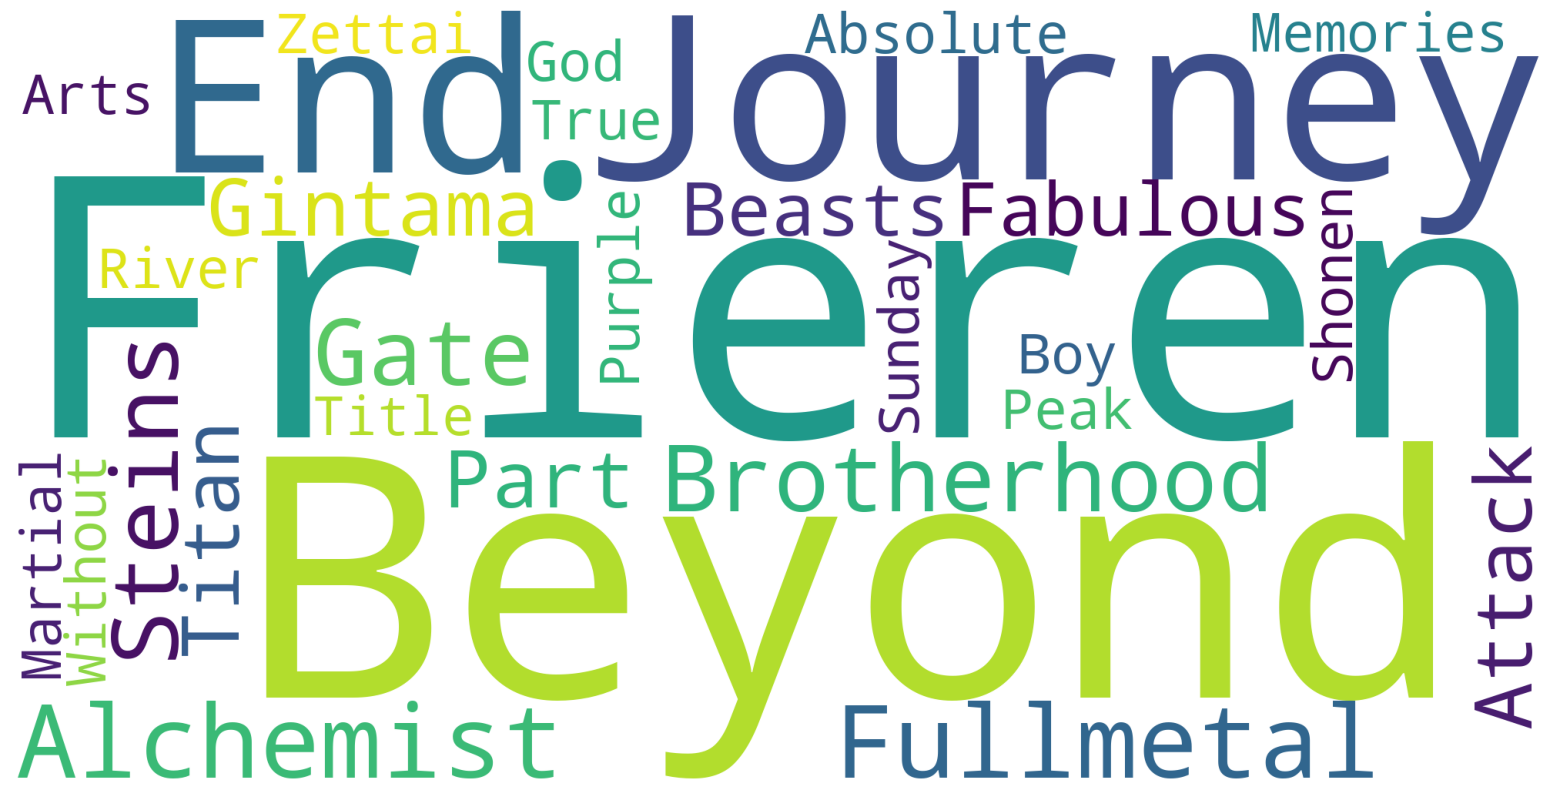

In [ ]:
#! tìm xem các từ chủ yếu được sử dụng trong Genre sử dụng word cloud
from wordcloud import WordCloud
from PIL import Image

wc = WordCloud(
    max_words= len(df['Title']),
    background_color='white',
    stopwords={'the','no','at','object','Name','Genre','dtype','Length','of','Synonyms','on','Chuan','season'},
    height=1000,
    width=2000)
wc.generate(str(df['Title']))
plt.figure(figsize=(20,10))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
for i in range(len(df['Title'])):
    if 'Frieren' in df['Title'][i]:
        print(i)
    

0
1979


In [ ]:
df.head(3)

,Title,Genre,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,Broadcast,...,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status,score
0,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy","Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,all,1,Shounen,Manga,Fridays at 23:00 (JST),...,40537,28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing,9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy","Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,Military,2,Shounen,Manga,"Sundays at 17:00 (JST) ', 'Aniplex, ...",...,226011,64,TV,"Aniplex, Square Enix, Mainichi Bro...",3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing,9.09
2,Steins;Gate,"Drama, Sci-Fi, Suspense","Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"Psychological, Time , Time Travel, Time Travel...",3,All,Visual novel,Wednesdays at 02:05 (JST),...,189650,24,TV,"Frontier Works, Media Factory, Kad...",13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing,9.07


In [ ]:
#! thường thì các bộ phim có các phần sau sẽ có phần đằng trước dấu : là giống nhau. Thử tìm ra các phim mà có dấu : rồi lấy 
#! tên phim phía trước:

my_dict = defaultdict(int)
for i in range(len(df['Title'])): 
    
    if ":" in df['Title'][i]:
        key = df['Title'][i].index(":")
        film_name = df['Title'][i][:key]
        #print(film_name)
        if film_name != 'Re':
            if (film_name in my_dict):
                my_dict[film_name] += 1
            else:
                my_dict[film_name] = 1
        
#! tuy nhiên, sẽ có những bộ phim có phần mà không đặt dấu : đằng trước, điều này khiến ta phải kiểm tra trong title:
all_dict = defaultdict(int)
for key in my_dict.keys():
    for film in df['Title']:
        if key in film:
            if key in all_dict:
                all_dict[key] += 1
            else:
                all_dict[key] = 1


In [ ]:
all_value = list(all_dict.values())
all_key = list(all_dict.keys())
all_value = all_value[:50]
all_key = all_key[:50]

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

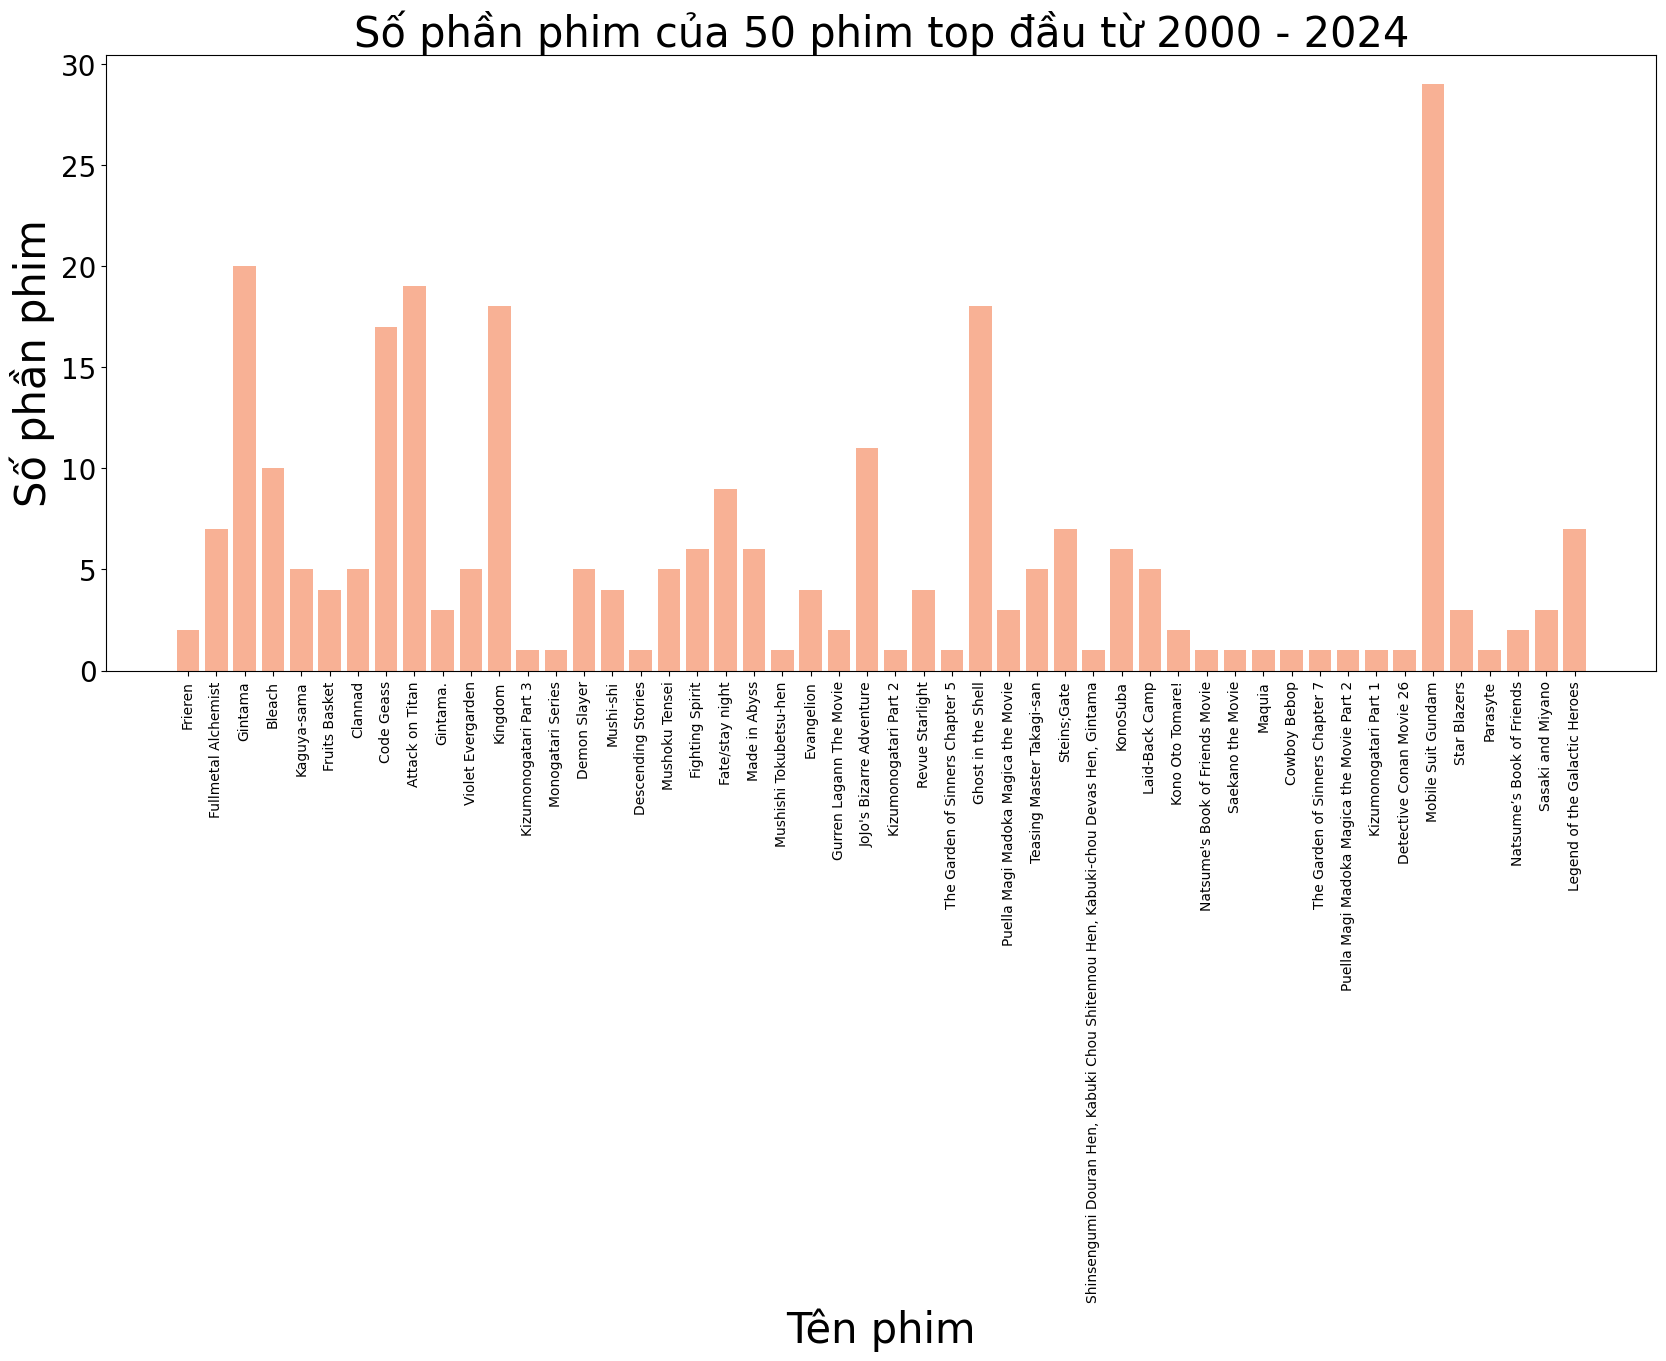

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Số phần phim của 50 phim top đầu từ 2000 - 2024",size=30)
plt.xlabel("Tên phim",size=30)
plt.ylabel("Số phần phim",size=30)

plt.bar(all_key,all_value,color='#F8B195')
plt.xticks(rotation=90,size=10)
plt.yticks(size=20)

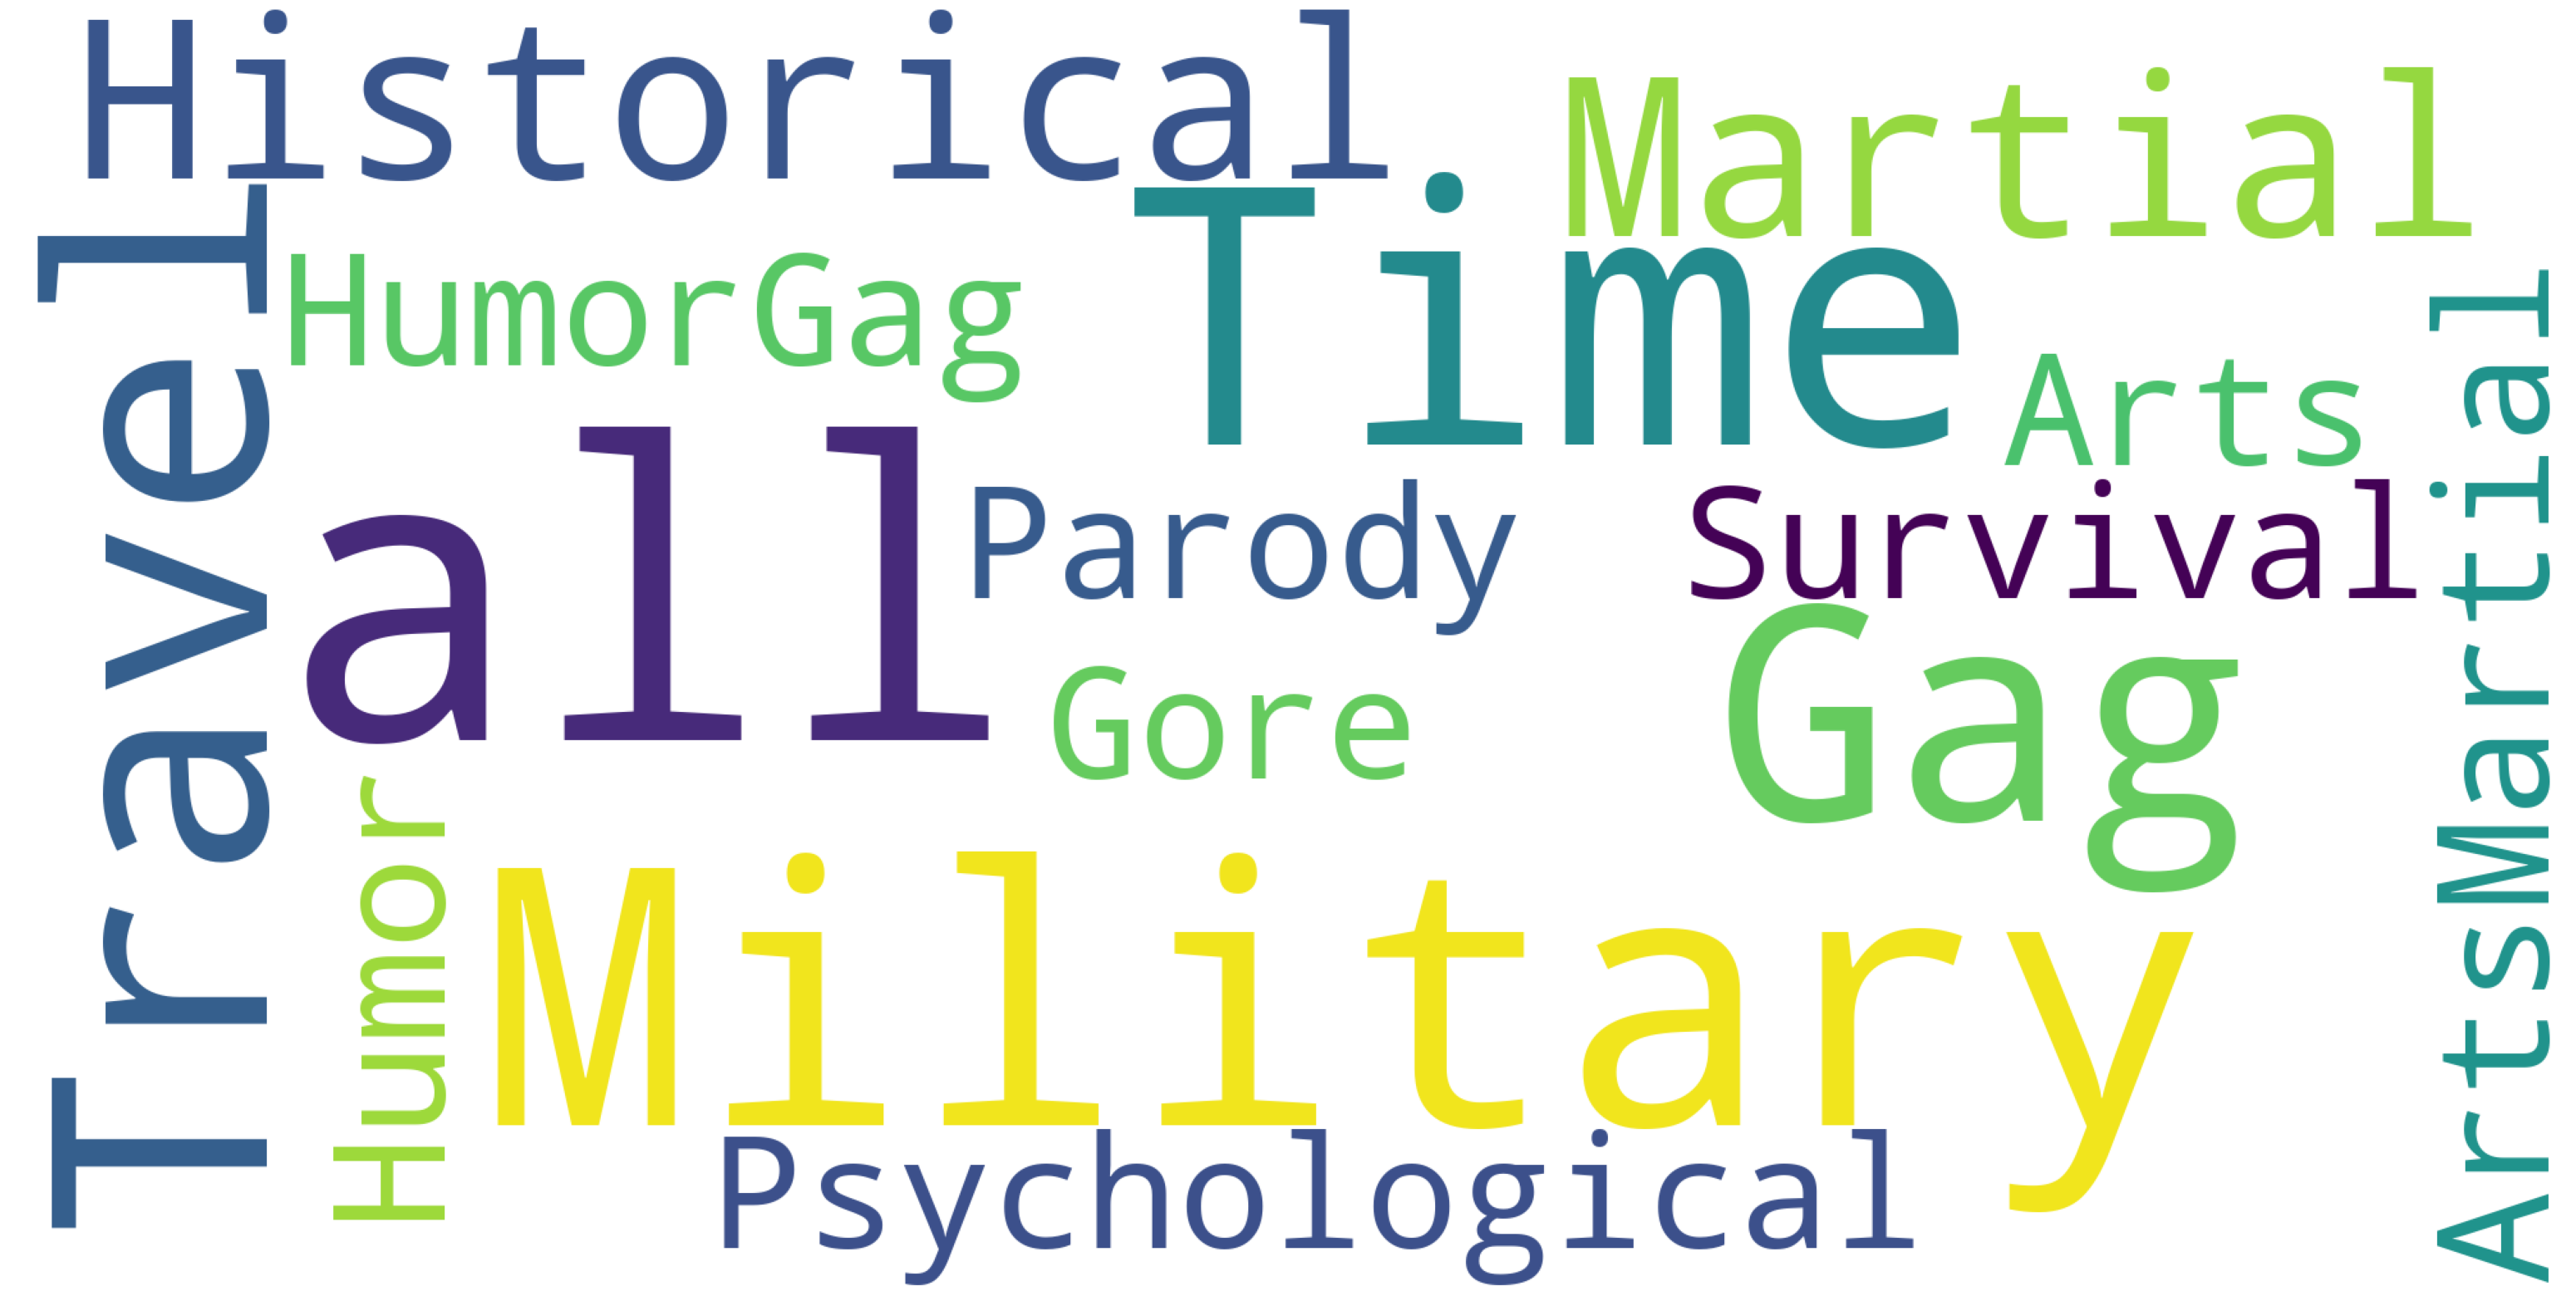

In [ ]:
from wordcloud import STOPWORDS,WordCloud

wc = WordCloud(
    max_words=len(df['Theme']),
    
    background_color='white',
    stopwords={'NaN','Length','object','Name','dtype','Theme','define','yet','not'},
    height=1000,
    width=2000
)
wc.generate(str(df['Theme']))
plt.figure(figsize=(40,20))
plt.clf()
plt.axis('off')
plt.imshow(wc)

In [ ]:
#! đếm xem xem có bao nhiêu phim là tên giống (tức là lúc này nó sẽ sinh ra nhiều phần)
#! cái này làm sau!

In [ ]:
#! kiểm tra số phim được onair trong các năm

on_air_film_year = defaultdict(int)
y = []
for i in range(25):
    temp = str(i)
    if len(temp) == 1:
        temp = '0' + temp
    y.append(temp)

for year in y:
    for value in df['Aired']:
        if ('20' + year)  in value:
            on_air_film_year['20' + year] += 1



(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

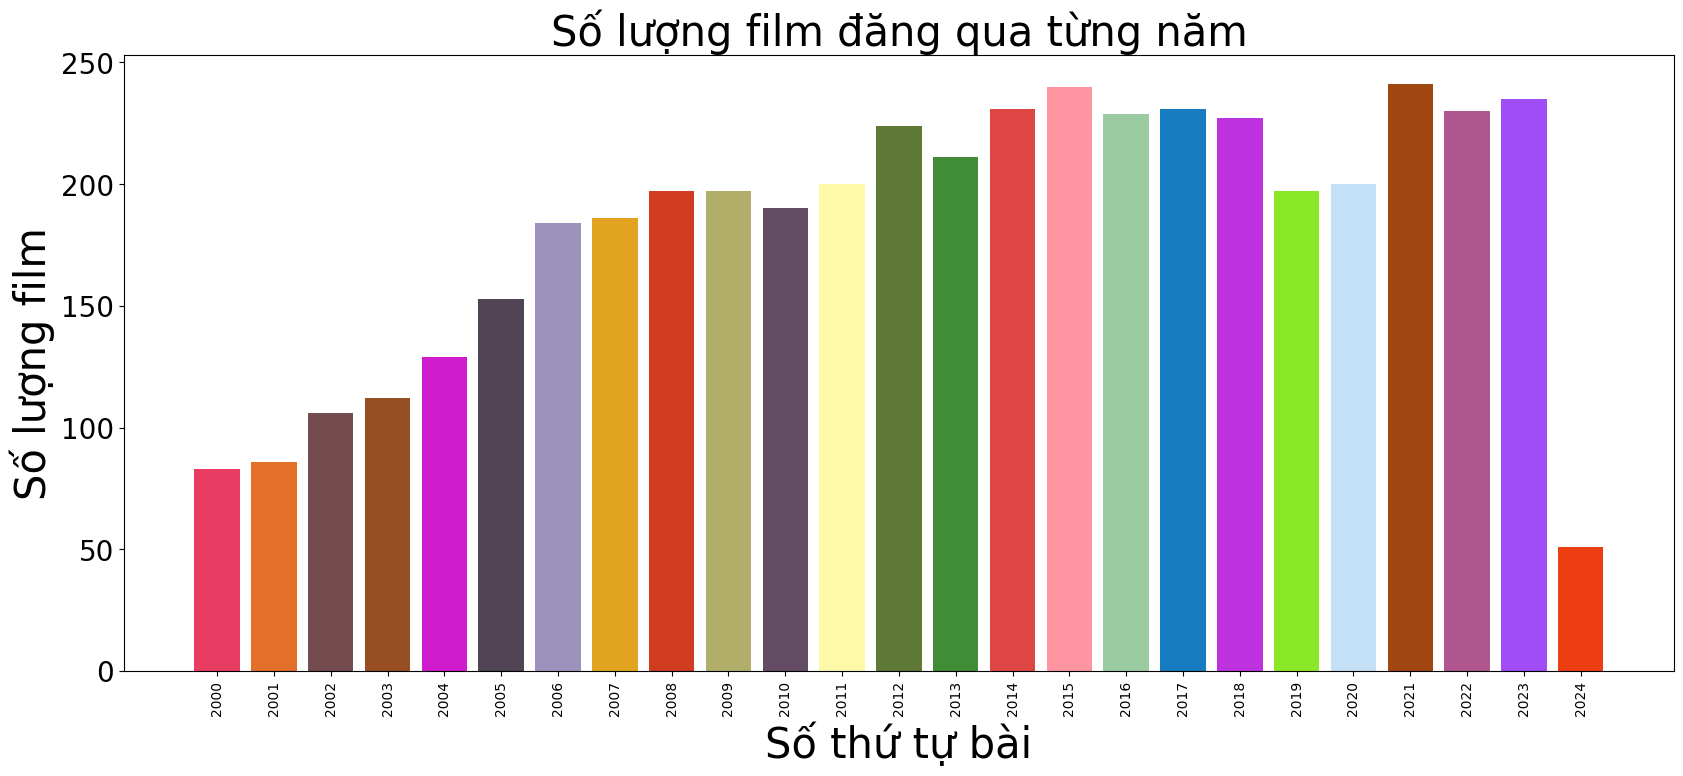

In [ ]:
#! kể từ năm 2000 tới 2024, số phim đã được phát hành trên page?
plt.figure(figsize=(20,8))
plt.title("Số lượng film đăng qua từng năm",size=30)
plt.xlabel("Số thứ tự bài",size=30)
plt.ylabel("Số lượng film",size=30)
keys = on_air_film_year.keys()
values = on_air_film_year.values()
plt.bar(keys,values,color=random_color)
plt.xticks(rotation=90,size=10)
plt.yticks(size=20)

In [ ]:
#! tự dưng năm 2023 tăng vọt lên. Tại sao? 

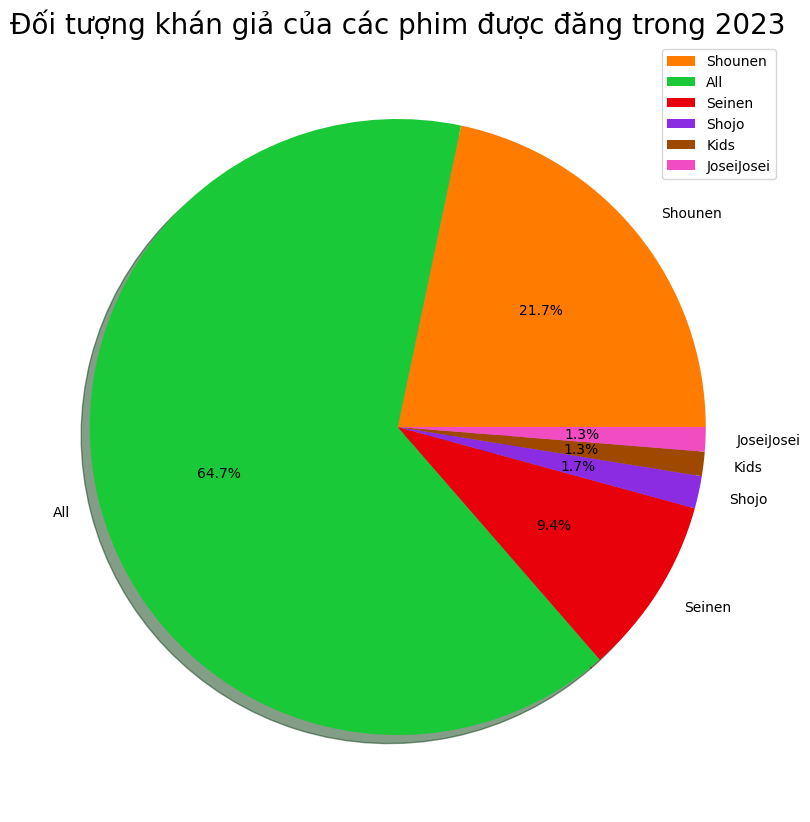

In [ ]:
#! đếm xem trong năm 2023 có ? thể loại các phim kia public
df_year_2023 = df[df['Aired'].str.contains('2023')]
dict_the_loai_count = defaultdict(int)
for i in df_year_2023['Demographic']:
    if i in dict_the_loai_count:
        dict_the_loai_count[i] += 1
    else:
        dict_the_loai_count[i] = 1
dict_the_loai_count

#! plot ra bieu do tron:
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Đối tượng khán giả của các phim được đăng trong 2023",size=20)

plt.pie(x=dict_the_loai_count.values(),labels=dict_the_loai_count.keys(), 
        colors = colors, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10})
plt.legend()
plt.show()

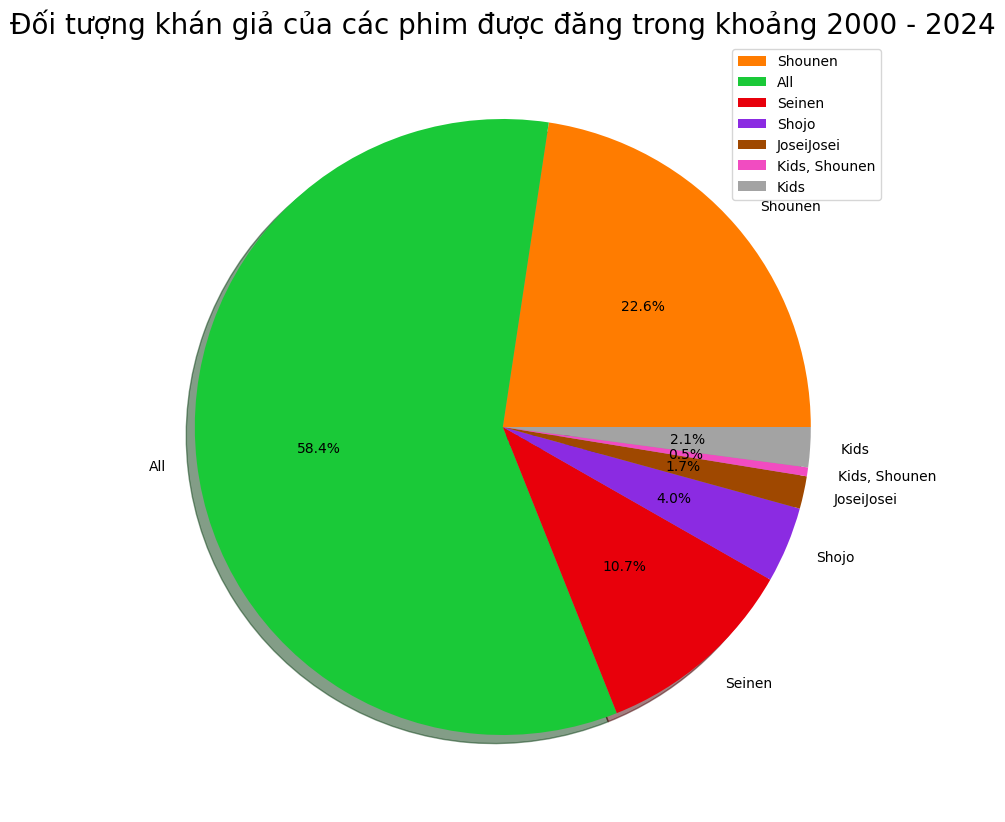

In [ ]:
#! tìm xem mỗi studio ra bao nhiêu phim trong các năm từ 2000 - 2024 và năm 2023 nói riêng?

dict_the_loai_count = defaultdict(int)
for i in df['Demographic']:
    if i in dict_the_loai_count:
        dict_the_loai_count[i] += 1
    else:
        dict_the_loai_count[i] = 1
dict_the_loai_count

#! plot ra bieu do tron:
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Đối tượng khán giả của các phim được đăng trong khoảng 2000 - 2024",size=20)

plt.pie(x=dict_the_loai_count.values(),labels=dict_the_loai_count.keys(), 
        colors = colors, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10})
plt.legend()
plt.show()

In [ ]:
df = df.drop(3271)

<BarContainer object of 16 artists>

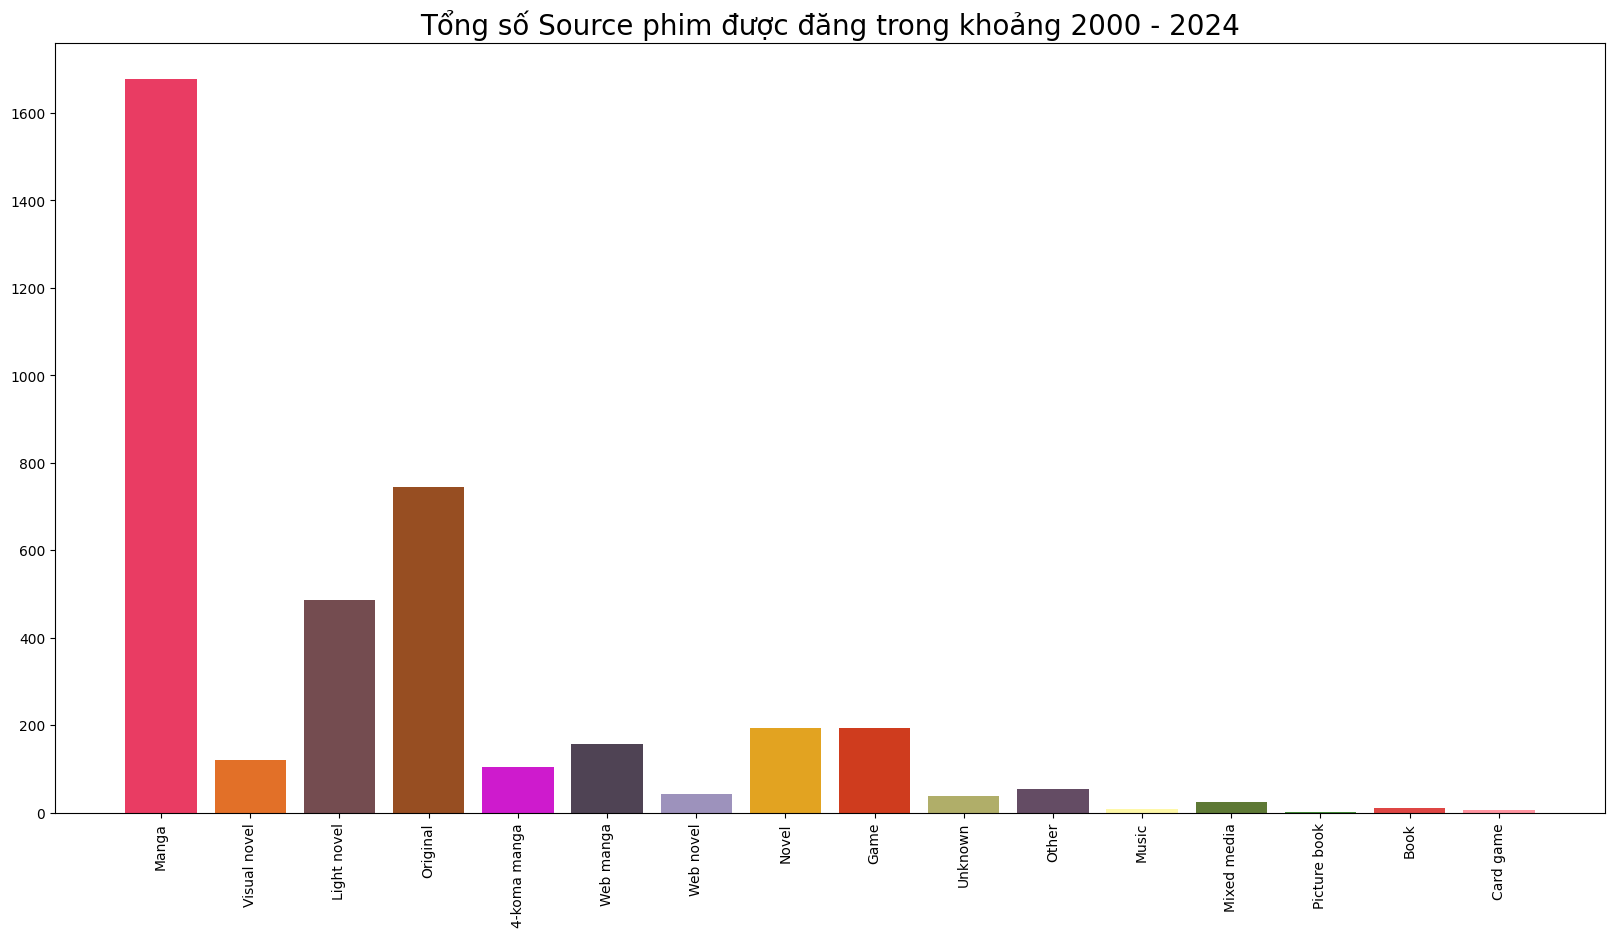

In [ ]:
#! Tổng số nguồn được đăng tải trong năm 2000 - 2024
dict_the_loai_count = defaultdict(int)
for i in df['Source']:
    if "Most" not in i: 
        if i in dict_the_loai_count:
            dict_the_loai_count[i] += 1
        else:   
            dict_the_loai_count[i] = 1
dict_the_loai_count

#! plot ra bieu do tron:
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Tổng số Source phim được đăng trong khoảng 2000 - 2024",size=20)
plt.xticks(rotation=90)
keys = dict_the_loai_count.keys()
values = dict_the_loai_count.values()
plt.bar(keys,values,color=random_color)

<BarContainer object of 10 artists>

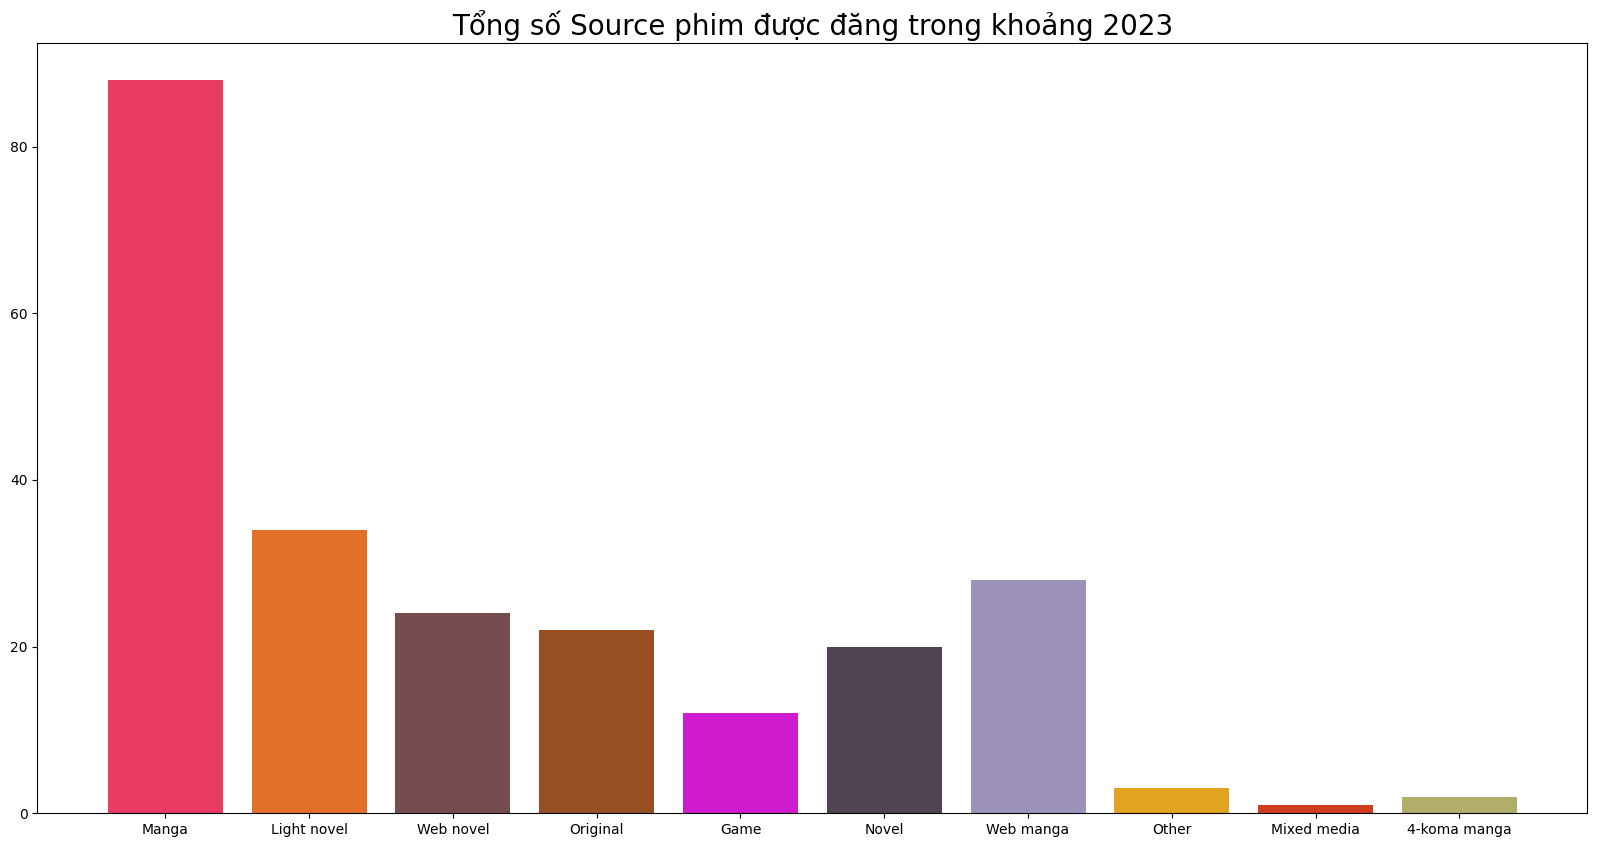

In [ ]:
df_year_2023 = df[df['Aired'].str.contains('2023')]
dict_the_loai_count = defaultdict(int)
for i in df_year_2023['Source']:
    if "Most" not in i:
        if i in dict_the_loai_count:
            dict_the_loai_count[i] += 1
        else:
            dict_the_loai_count[i] = 1
dict_the_loai_count

#! plot ra bieu do tron:
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Tổng số Source phim được đăng trong khoảng 2023",size=20)
keys = dict_the_loai_count.keys()
values = dict_the_loai_count.values()
plt.bar(keys,values,color=random_color)

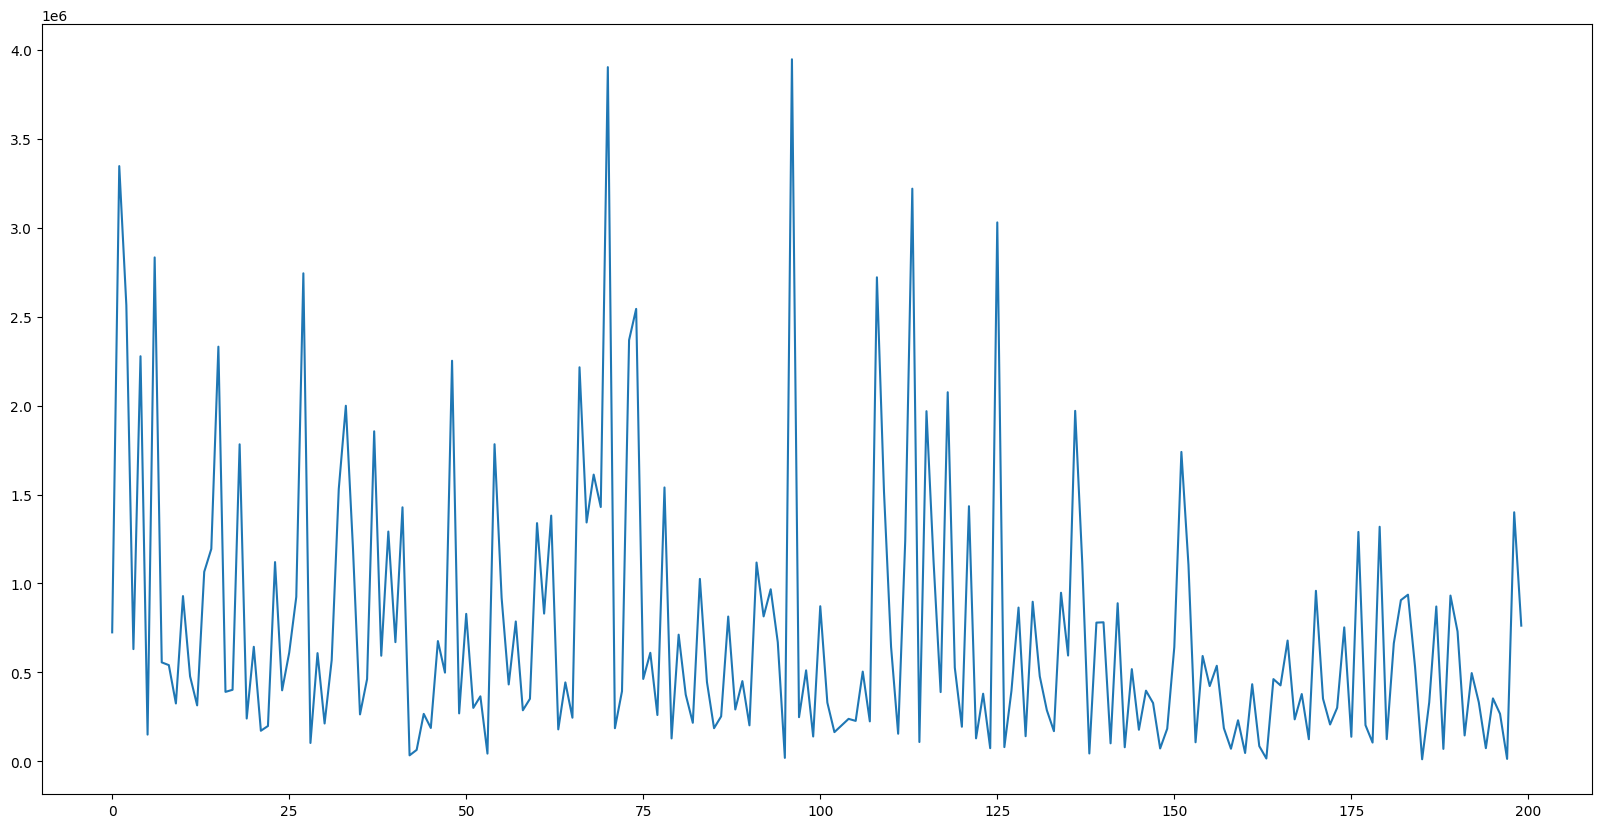

In [ ]:

colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
x = [i for i in range(len(df['Members'][:200]))]
plt.plot(x,df['Members'][:200])

In [ ]:
#! lấy ra 3 bộ phim có member cao nhất để phân tích:


In [ ]:
df.head(3)

,Title,Genre,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,Broadcast,...,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status,score
0,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy","Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,all,1,Shounen,Manga,Fridays at 23:00 (JST),...,40537,28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing,9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy","Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,Military,2,Shounen,Manga,"Sundays at 17:00 (JST) ', 'Aniplex, ...",...,226011,64,TV,"Aniplex, Square Enix, Mainichi Bro...",3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing,9.09
2,Steins;Gate,"Drama, Sci-Fi, Suspense","Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"Psychological, Time , Time Travel, Time Travel...",3,All,Visual novel,Wednesdays at 02:05 (JST),...,189650,24,TV,"Frontier Works, Media Factory, Kad...",13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing,9.07


### Sử dụng wordcloud để xem studio nào xuất hiện nhiều nhất

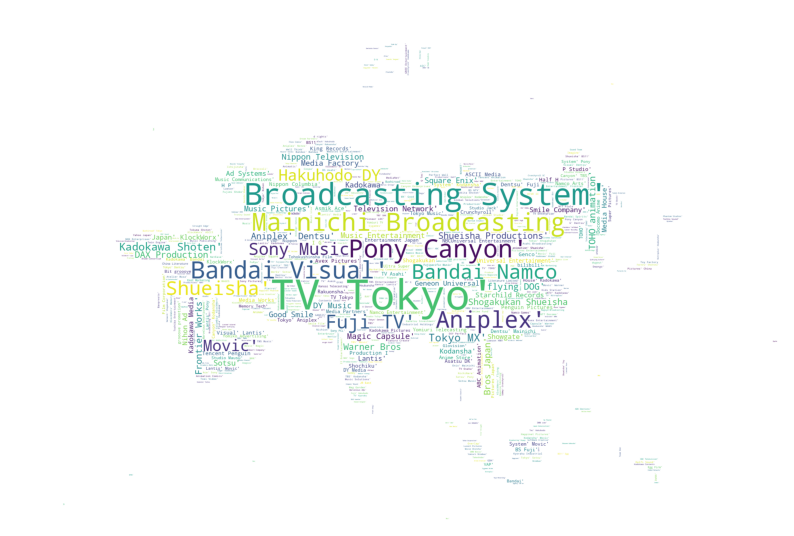

In [ ]:
all_studio_unique = []

for i in df['Producers']:
    if "," in i:
        element = i.split(",")
        all_studio_unique.append(element)
    element = []
#! loại bỏ hết khoảng trắng trong từng studio:
new_studio_unique = []
temp = []
for studio in all_studio_unique:
    for i in studio:
        temp.append(i.strip())
    new_studio_unique.append(temp)
    temp = []
    
image = np.array(Image.open(r'./image_word_cloud/asian.jpg'))
wc = WordCloud(
    mask = image,
    background_color='white',
    max_words=len(new_studio_unique),
    stopwords={'None','add','\'','found','found\'','some\'','AT','X\''},
    height=image.shape[0],
    width=image.shape[1]
)
wc.generate(str(new_studio_unique))
plt.figure(figsize=(10,10))
plt.clf()
plt.axis('off')
plt.imshow(wc)

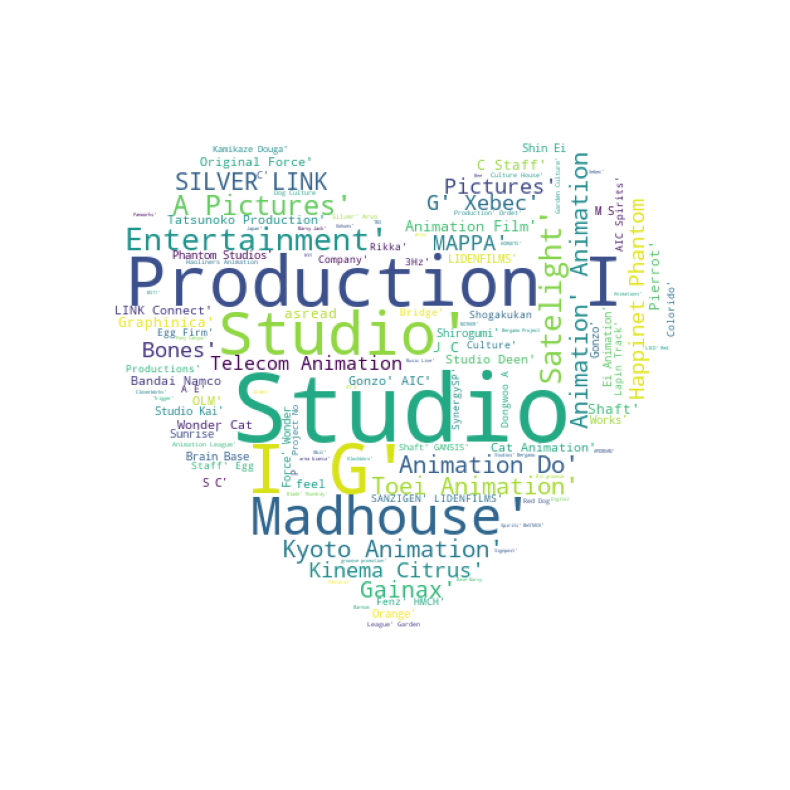

In [ ]:
#! vì có thể các studio là hợp tác cùng nhau. Nên mình sẽ tách hết dấu phẩy, và đếm xem số studio. 

#! extract toàn bộ studio trong Studios bằng các split theo dấu phẩy
all_studio_unique = []

for i in df['Studios']:
    if "," in i:
        element = i.split(",")
        all_studio_unique.append(element)
    element = []
#! loại bỏ hết khoảng trắng trong từng studio:
new_studio_unique = []
temp = []
for studio in all_studio_unique:
    for i in studio:
        temp.append(i.strip())
    new_studio_unique.append(temp)
    temp = []


#! Sử dụng wordcloud để xem studio nào xuất hiện nhiều nhất
image = np.array(Image.open(r'./image_word_cloud/tym2.jpg'))
wc = WordCloud(
    mask = image,
    background_color='white',
    max_words=len(new_studio_unique),
    stopwords={'None','add','\'','found','found\'','some\''},
    height=image.shape[0],
    width=image.shape[1]
)
wc.generate(str(new_studio_unique))
plt.figure(figsize=(10,10))
plt.clf()
plt.axis('off')
plt.imshow(wc)

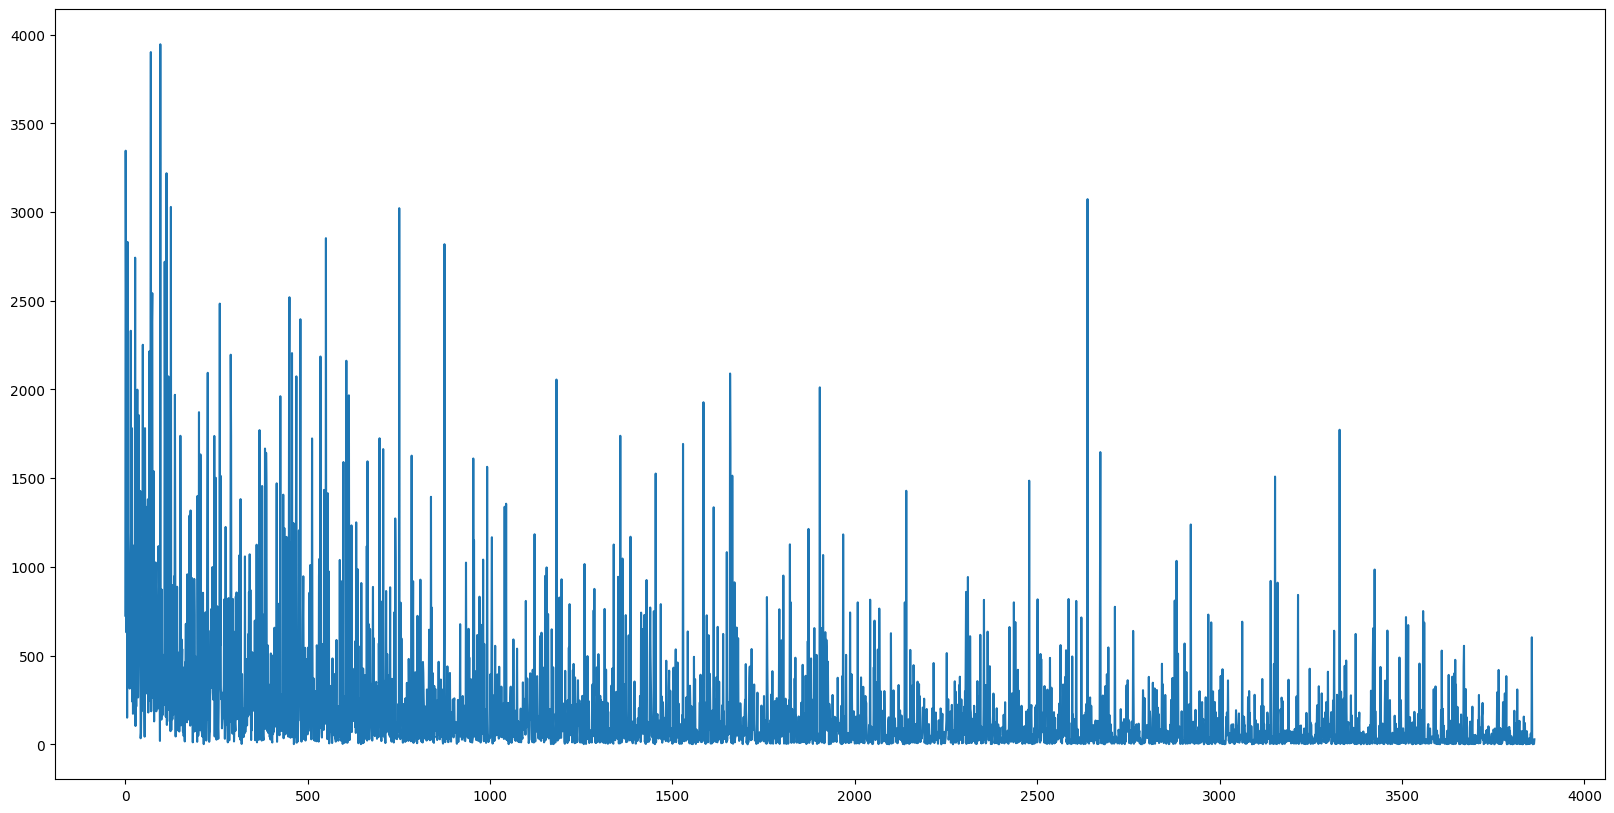

In [ ]:
#! kiểm tra xem member của từng bộ phim:
#! vì member quá nhiều nên mình chỉ để ở số trăm nghìn thôi, rồi ghi đơn vị là nghìn ở cột y 
my_member = []
for i in df['Members']:
    temp = i//1000
    my_member.append(temp)
x = [i for i in range(len(my_member))]
plt.figure(figsize=(20,10))
plt.plot(x,my_member)

In [ ]:
df.head(3)

,Title,Genre,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,Broadcast,...,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status,score
0,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy","Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,all,1,Shounen,Manga,Fridays at 23:00 (JST),...,40537,28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing,9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy","Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,Military,2,Shounen,Manga,"Sundays at 17:00 (JST) ', 'Aniplex, ...",...,226011,64,TV,"Aniplex, Square Enix, Mainichi Bro...",3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing,9.09
2,Steins;Gate,"Drama, Sci-Fi, Suspense","Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"Psychological, Time , Time Travel, Time Travel...",3,All,Visual novel,Wednesdays at 02:05 (JST),...,189650,24,TV,"Frontier Works, Media Factory, Kad...",13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing,9.07


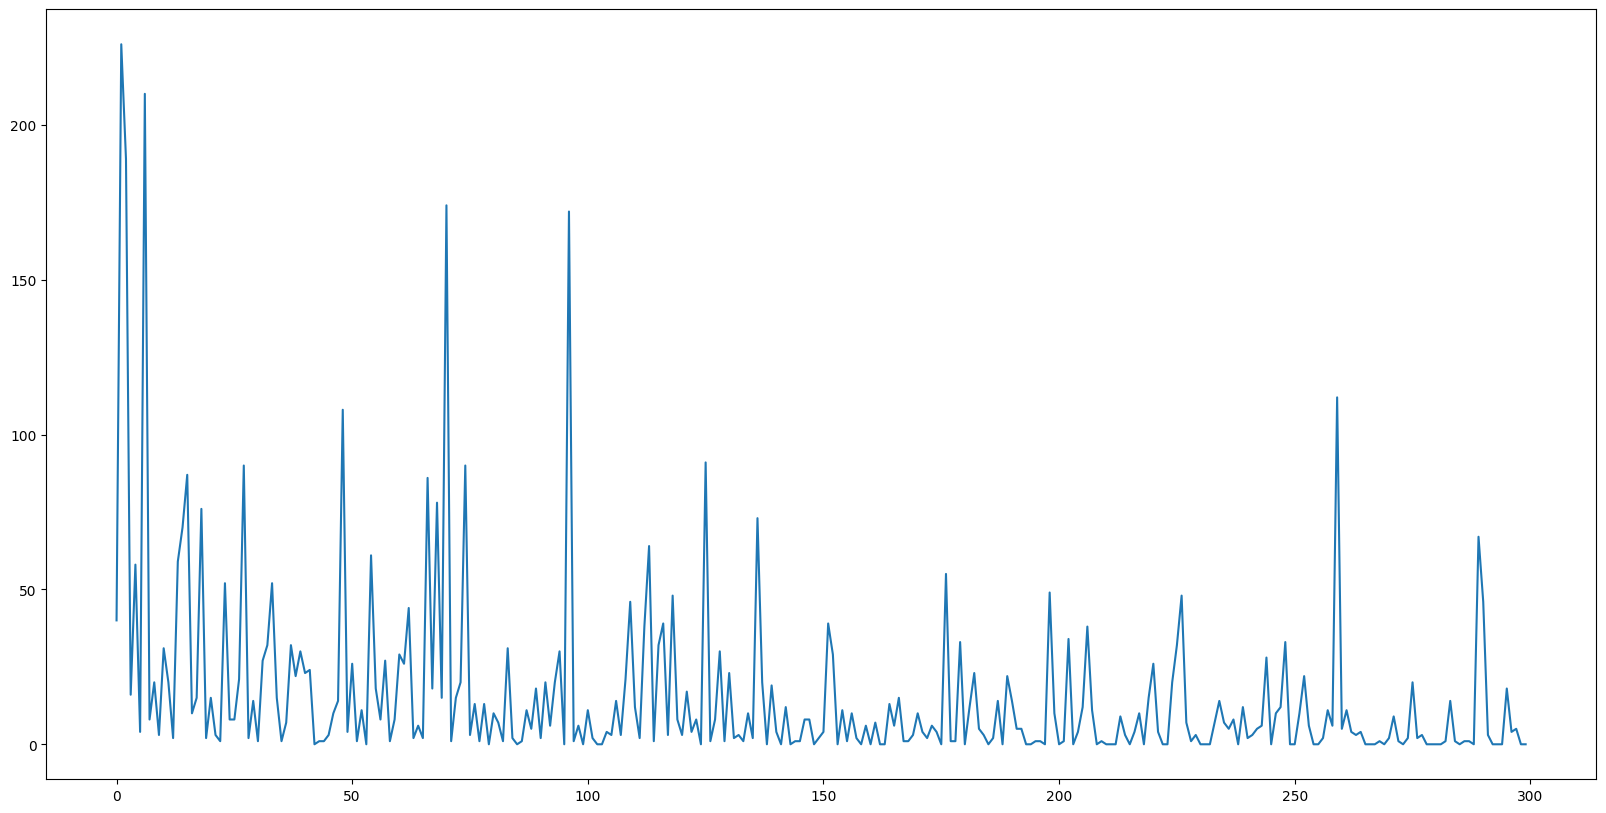

In [ ]:
#! phân tích favourite
my_favor = []
for i in df['Favorites'][:300]:
    temp = i//1000
    my_favor.append(temp)
x = [i for i in range(len(my_favor))]
plt.figure(figsize=(20,10))
plt.plot(x,my_favor)

In [ ]:
df['Favorites'][0]

40537

In [ ]:
# df.head(22)